# The vertical Sato-Tate-Distribution



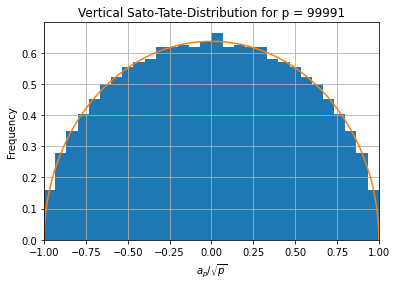

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from math import asin, log, sqrt

def ecs_over_F(p):
    F = GF(p)
    the_1728_j = F(1728)

    js = list(range(1,p))
    js.remove(the_1728_j) #needs to be handled separately
    cardinalities = np.array([])
    for j in my_simple_js:
        E = EllipticCurve_from_j(F(j), minimal_twist=False)
        np.append(cardinalities, E.cardinality())
        # |E| + |E'| = 2p+2
    cardinalities = (cardinalities - (p+1))/float(2 * sqrt(p))
    np.append(cardinalities, -cardinalities)
    return cardinalities

def normalized_aps(p):
    F = GF(p)
    the_1728_j = F(1728)

    js = list(range(1,p))
    js.remove(the_1728_j) #needs to be handled separately
    without_twist_aps = (np.array([EllipticCurve_from_j(F(j), minimal_twist=False).cardinality() for j in js]) - (p+1))/float(2 * sqrt(p))

    all_aps = np.append(without_twist_aps, -without_twist_aps)
    return all_aps

def histogram(v, num_bins, p):
    n, bins, patches = plt.hist(v, num_bins, density=True)
    angle = np.linspace(0, np.pi, 150) 
    radius = 1
    x = radius * np.cos(angle) 
    y = radius * np.sin(angle) * 2 / np.pi #stretching so that area = 1
    plt.plot(x, y)
    plt.xlabel('$a_p/\\sqrt{p}$')
    plt.ylabel('Frequency')
    plt.title('Vertical Sato-Tate-Distribution for p = {}'.format(p))
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.xlim(-1,1)
    #plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

In [ ]:
p = 99991
v = normalized_aps(p)
histogram(v, 30, p)

p:  2467  val:  1.9692989536559623e-05
p:  2557  val:  1.500125209653566e-05
p:  2659  val:  1.7527105800269712e-05
p:  2711  val:  1.6697095467430862e-05
p:  2789  val:  1.6847289238528083e-05
p:  2857  val:  1.791659814028208e-05
p:  2953  val:  1.32945117584369e-05
p:  3037  val:  1.5812835963727045e-05
p:  3121  val:  1.3510727835191359e-05
p:  3217  val:  1.3990170962320335e-05
p:  3307  val:  1.3863988841099395e-05
p:  3371  val:  1.666559487381861e-05
p:  3463  val:  1.5831670642615377e-05
p:  3539  val:  1.3179860369887317e-05
p:  3613  val:  1.1924064736500311e-05
p:  3691  val:  1.2649957989142302e-05
p:  3769  val:  1.2631089559539912e-05
p:  3853  val:  1.1418915260813013e-05
p:  3929  val:  1.1628032553796965e-05
p:  4019  val:  1.2991432946051126e-05
p:  4099  val:  1.2038751401914494e-05
p:  4201  val:  9.990454088329051e-06
p:  4261  val:  1.2760028392824018e-05
p:  4357  val:  1.044347394105235e-05
p:  4451  val:  1.294960873528074e-05
p:  4523  val:  1.290527596137950

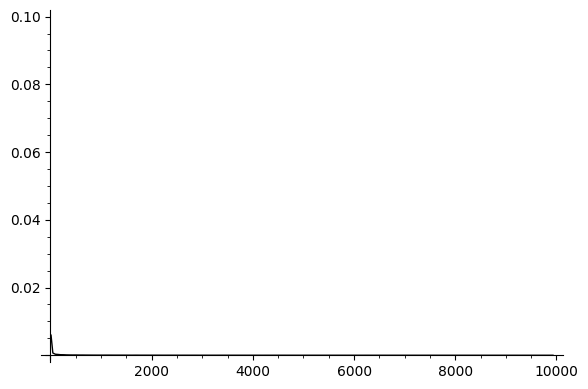

In [86]:
import bisect

def liney(y, xmin,xmax):
    return line([(xmin,y),(xmax,y)], rgbcolor=(1,0,0))

def Xab(a,b):
    bb = (asin(b)/2r + b*sqrt(1r-b^2r)/2r)
    aa = (asin(a)/2r + a*sqrt(1r-a^2r)/2r)
    def X(T):
        return (asin(T)/2r + T*sqrt(1r-T^2r)/2r - aa)/(bb - aa)
    return X

def sorted_aplist(p):
    v = normalized_aps(p)
    v.sort()
    return v

def Ypab(p, a=-1, b=1):
    v = sorted_aplist(p)
    denom = bisect.bisect_right(v, float(b)) - bisect.bisect_left(v, float(a))
    try:
        normalize = float(1)/denom
    except:
        def Y(T):
            return 1.0r
        return Y
    start_pos = bisect.bisect_left(v, float(a))

    def Y(T):
        # find position that T would go in if it were inserted
        # in the sorted list v.
        n = bisect.bisect_right(v, float(T)) - start_pos
        return n * normalize
    return Y

global _delta

def Delta(p, a, b, max_points=300):
    """
    Delta_{a}^{b} function:
    INPUT: C - cutoff
    a,b - evaluate over the interval (a,b)
    max_points - number of points used in numerical integral
    """
    global _delta
    key = (p,a,b,max_points)
    try:
        return _delta[key]
    except NameError:
        _delta = {}
    except KeyError:
        pass
    X = Xab(a,b)
    Y = Ypab(p,a,b)
    def h(T):
        return (X(T) - Y(T))^2r
    
    val, err = integral_numerical(h, a, b, max_points=max_points, algorithm='qag', rule=1, eps_abs=1e-10, eps_rel=1e-10)
    
    _delta[key] = (val, err)
    print("p: ", p, " val: ", val)
    return val, err

def plot_Delta(pmax, step_size=10, max_points=100, a=-1, b=1):
    v = [(p,Delta(p, a, b, max_points=max_points)[0]) for p in prime_range(10,pmax)[::step_size]]
    return line(v,rgbcolor=(0,0,0), ymin=0, ymax=0.1)

plot_Delta(10000)

In [95]:
def theta(p, a=-1, b=1, max_points=300):
    val, err = Delta(p, a, b, max_points=max_points)
    return -log(val)/log(p), val, err

def theta_interval(p, a=-1, b=1, max_points=300):
    val, err = Delta(p, a, b, max_points=max_points)
    return -log(val-abs(err))/log(p), -log(val+abs(err))/log(p)

def compute_theta(p, step_size=None, a=-1, b=1, max_points=300, verbose=False):
    a,b = (float(a), float(b))
    if not step_size:
        step_size = max(1, int(p/(20 * log(p)))) # grows with pi(p)

    def f(p):
        z = theta(p, a, b, max_points=max_points)
        if verbose: print(p, z)
        return z[0]

    #calls theta (= log etc. angewandt auf Delta)
    return [(x,f(x)) for x in prime_range(100, p)[::step_size]]

def compute_theta_interval(p, step_size=None, a=-1, b=1, max_points=300, verbose=False):
    a,b = (float(a), float(b))
    if not step_size:
        step_size = max(1, int(p/(20 * log(p)))) # grows with pi(p)
    vmin = []; vmax = []
    for C in prime_range(100, p)[::step_size]:
        zmin,zmax = self.theta_interval(C, a, b, max_points=max_points)
        vmin.append((C, zmin))
        vmax.append((C, zmax))
        if verbose: 
            print(C, zmin, zmax)
    return vmin, vmax

def plot_theta_interval(p, clr=(0,0,0), *args, **kwds):
    vmin, vmax = compute_theta_interval(p, *args, **kwds)
    v = compute_theta(p, *args, **kwds)
    grey = (0.7,0.7,0.7)
    return line(vmin,rgbcolor=grey, ymin=0,ymax=1.2) + line(vmax,rgbcolor=grey) + point(v,rgbcolor=clr) + line(v,rgbcolor=clr) + liney(1.3,0, p)

def plot_theta(p, clr=(0,0,0), *args, **kwds):
    v = compute_theta(p, *args, **kwds)
    return point(v,rgbcolor=clr, ymin=0, ymax=2) + line(v, rgbcolor=clr) + liney(1.3,0,p)

plot_theta(10000)

p:  1123  val:  3.9562419079233344e-05
p:  1531  val:  3.1312796724941725e-05
p:  1949  val:  2.547620676256821e-05
p:  2357  val:  2.3810570828533676e-05
p:  3251  val:  1.6297910669811577e-05
p:  3671  val:  1.692277896874142e-05
p:  4111  val:  1.071687145640545e-05
p:  4583  val:  1.215893452745231e-05
p:  5023  val:  9.251547066346134e-06
p:  5507  val:  1.0323991104420067e-05
p:  6427  val:  7.214976027006505e-06
p:  6917  val:  7.23450345921102e-06
p:  7457  val:  7.996229364125763e-06
p:  7901  val:  6.889001517062094e-06
p:  8419  val:  6.125058886656721e-06
p:  8867  val:  8.184384135351833e-06
p:  9839  val:  5.28021664646467e-06


NameError: name 'liney' is not defined